# Image Classification Model Training using TensorFlow by Anurug Upascha
## Dog vs Cat Classification with Keras Applications

### 1. Import Libraries
```python
import matplotlib.pyplot as plt
...
```
Cell ‡∏ô‡∏µ‡πâ‡∏ó‡∏≥‡∏Å‡∏≤‡∏£ import libraries ‡∏ó‡∏µ‡πà‡∏à‡∏≥‡πÄ‡∏õ‡πá‡∏ô‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏Å‡∏≤‡∏£‡∏™‡∏£‡πâ‡∏≤‡∏á‡πÅ‡∏•‡∏∞‡∏ù‡∏∂‡∏Å‡πÇ‡∏°‡πÄ‡∏î‡∏• ‡πÄ‡∏ä‡πà‡∏ô TensorFlow, Keras, NumPy ‡πÅ‡∏•‡∏∞ libraries ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏Å‡∏≤‡∏£‡πÅ‡∏™‡∏î‡∏á‡∏ú‡∏•

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import *
import seaborn as sns
import PIL
import tensorflow as tf
from keras.callbacks import ModelCheckpoint, TensorBoard, CSVLogger
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping, ReduceLROnPlateau
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import *
from tensorflow.keras.applications import *
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import *
import os
print("tf Version = ",tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU'))) #if use WSL2

tf Version =  2.20.0
Num GPUs Available:  0


### 2. Configuration Setup
```python
batch_size = 24
...
```
Cell ‡∏ô‡∏µ‡πâ‡∏Å‡∏≥‡∏´‡∏ô‡∏î‡∏Ñ‡πà‡∏≤ parameters ‡∏û‡∏∑‡πâ‡∏ô‡∏ê‡∏≤‡∏ô‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏Å‡∏≤‡∏£‡∏ù‡∏∂‡∏Å‡πÇ‡∏°‡πÄ‡∏î‡∏•:
- ‡∏Ç‡∏ô‡∏≤‡∏î batch size
- ‡∏Ç‡∏ô‡∏≤‡∏î‡∏Ç‡∏≠‡∏á‡∏£‡∏π‡∏õ‡∏†‡∏≤‡∏û input
- ‡∏ï‡∏≥‡πÅ‡∏´‡∏ô‡πà‡∏á‡∏Ç‡∏≠‡∏á dataset

In [62]:
batch_size = 24
img_height = 224
img_width = 224
data_dir = 'datasets/chest_xray/'

### 3.1 Load Training Dataset
```python
train_ds = tf.keras.utils.image_dataset_from_directory(
...
```
Cell ‡∏ô‡∏µ‡πâ‡πÇ‡∏´‡∏•‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏Å‡∏≤‡∏£‡∏ù‡∏∂‡∏Å‡∏ù‡∏ô (training set) ‡πÇ‡∏î‡∏¢‡πÅ‡∏ö‡πà‡∏á 70% ‡∏Ç‡∏≠‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î

In [63]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.3,  # First split: 70% training, 30% for val+test
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 5856 files belonging to 2 classes.
Using 4100 files for training.


### 3.2 Load Validation and Test Datasets
```python
remaining_ds = tf.keras.utils.image_dataset_from_directory(
...
```
Cell ‡∏ô‡∏µ‡πâ‡πÇ‡∏´‡∏•‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏™‡πà‡∏ß‡∏ô‡∏ó‡∏µ‡πà‡πÄ‡∏´‡∏•‡∏∑‡∏≠ 30% ‡πÄ‡∏û‡∏∑‡πà‡∏≠‡∏ô‡∏≥‡πÑ‡∏õ‡πÅ‡∏ö‡πà‡∏á‡πÄ‡∏õ‡πá‡∏ô validation ‡πÅ‡∏•‡∏∞ test sets

In [64]:
remaining_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.3,  # Taking the remaining 30%
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 5856 files belonging to 2 classes.
Using 1756 files for validation.


### 3.3 Split Validation and Test Sets
```python
val_batches = tf.data.experimental.cardinality(remaining_ds) // 2
...
```
Cell ‡∏ô‡∏µ‡πâ‡πÅ‡∏ö‡πà‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ó‡∏µ‡πà‡πÄ‡∏´‡∏•‡∏∑‡∏≠‡∏≠‡∏≠‡∏Å‡πÄ‡∏õ‡πá‡∏ô validation set ‡πÅ‡∏•‡∏∞ test set ‡∏≠‡∏¢‡πà‡∏≤‡∏á‡∏•‡∏∞‡∏Ñ‡∏£‡∏∂‡πà‡∏á

```python
val_ds = remaining_ds.take(val_batches)
test_ds = remaining_ds.skip(val_batches)
```


*   take(val_batches) ‡∏Ñ‡∏∑‡∏≠‡∏Å‡∏≤‡∏£‡∏ô‡∏≥‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• n batch ‡πÅ‡∏£‡∏Å‡∏à‡∏≤‡∏Å remaining_ds ‡∏°‡∏≤‡πÄ‡∏õ‡πá‡∏ô validation set
*   ‡∏ñ‡πâ‡∏≤ val_batches = 10 ‡∏à‡∏∞‡πÄ‡∏õ‡πá‡∏ô‡∏Å‡∏≤‡∏£‡∏ô‡∏≥ 10 batch ‡πÅ‡∏£‡∏Å‡∏°‡∏≤‡πÄ‡∏õ‡πá‡∏ô validation set
*   skip(val_batches) ‡∏Ñ‡∏∑‡∏≠‡∏Å‡∏≤‡∏£‡∏Ç‡πâ‡∏≤‡∏°‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• n batch ‡πÅ‡∏£‡∏Å ‡πÅ‡∏•‡πâ‡∏ß‡∏ô‡∏≥‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ó‡∏µ‡πà‡πÄ‡∏´‡∏•‡∏∑‡∏≠‡∏°‡∏≤‡πÄ‡∏õ‡πá‡∏ô test set
*   ‡∏ñ‡πâ‡∏≤ val_batches = 10 ‡∏à‡∏∞‡πÄ‡∏õ‡πá‡∏ô‡∏Å‡∏≤‡∏£‡∏Ç‡πâ‡∏≤‡∏° 10 batch ‡πÅ‡∏£‡∏Å ‡πÅ‡∏•‡πâ‡∏ß‡∏ô‡∏≥‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ó‡∏µ‡πà‡πÄ‡∏´‡∏•‡∏∑‡∏≠‡∏°‡∏≤‡πÄ‡∏õ‡πá‡∏ô test set


In [65]:
val_batches = tf.data.experimental.cardinality(remaining_ds) // 2
test_batches = val_batches

In [66]:
val_ds = remaining_ds.take(val_batches)
test_ds = remaining_ds.skip(val_batches)

### 3.4 Get Class Information
```python
class_names = train_ds.class_names
...
```
Cell ‡∏ô‡∏µ‡πâ‡πÅ‡∏™‡∏î‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏Ç‡∏≠‡∏á classes ‡∏ó‡∏µ‡πà‡πÉ‡∏ä‡πâ‡πÉ‡∏ô‡∏Å‡∏≤‡∏£‡∏à‡∏≥‡πÅ‡∏ô‡∏Å (dog ‡πÅ‡∏•‡∏∞ cat) ‡πÅ‡∏•‡∏∞‡∏à‡∏≥‡∏ô‡∏ß‡∏ô classes

In [67]:
class_names = train_ds.class_names
num_classes = len(class_names)
print('classname: ',class_names)
print('class: ',num_classes)

classname:  ['NORMAL', 'PNEUMONIA']
class:  2


### 4. Visualize Sample Images
```python
plt.figure(figsize=(10, 10))
...
```
Cell ‡∏ô‡∏µ‡πâ‡πÅ‡∏™‡∏î‡∏á‡∏ï‡∏±‡∏ß‡∏≠‡∏¢‡πà‡∏≤‡∏á‡∏£‡∏π‡∏õ‡∏†‡∏≤‡∏û‡∏à‡∏≤‡∏Å training set ‡∏û‡∏£‡πâ‡∏≠‡∏°‡∏Å‡∏±‡∏ö labels

(24, 224, 224, 3)
(24,)


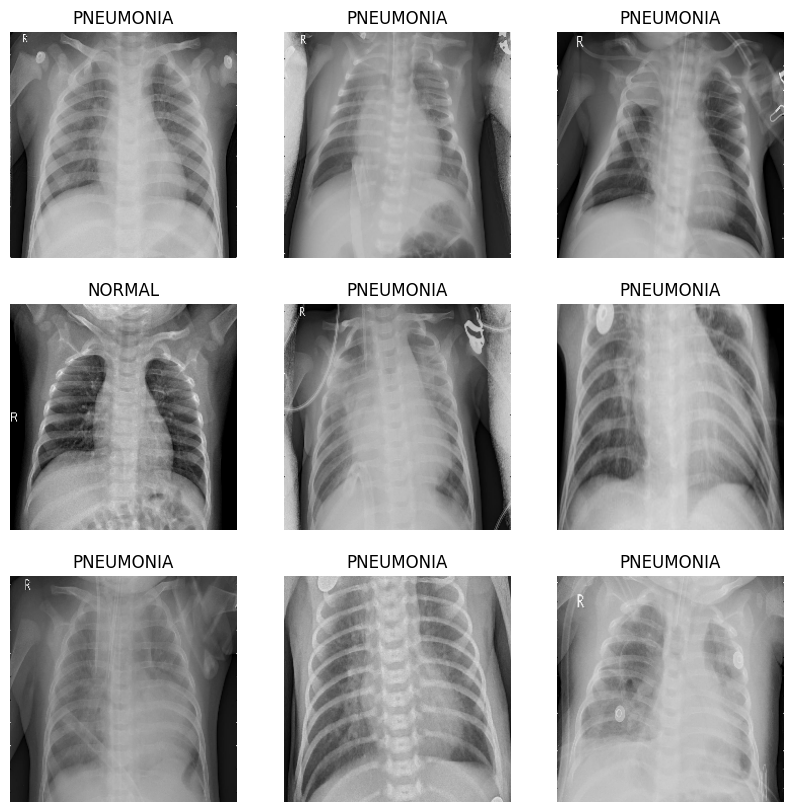

In [68]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

### 5. Optimize Dataset Performance and Normalize Image Data
```python
AUTOTUNE = tf.data.AUTOTUNE
...
```
Cell ‡∏ô‡∏µ‡πâ‡∏õ‡∏£‡∏±‡∏ö‡πÅ‡∏ï‡πà‡∏á dataset pipeline ‡πÄ‡∏û‡∏∑‡πà‡∏≠‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏õ‡∏£‡∏∞‡∏™‡∏¥‡∏ó‡∏ò‡∏¥‡∏†‡∏≤‡∏û‡πÉ‡∏ô‡∏Å‡∏≤‡∏£‡∏ù‡∏∂‡∏Å‡πÇ‡∏°‡πÄ‡∏î‡∏•
#### ‡∏Å‡∏≤‡∏£ Normalize ‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏£‡∏π‡∏õ‡∏†‡∏≤‡∏û

‡∏Å‡∏≤‡∏£ normalize ‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏£‡∏π‡∏õ‡∏†‡∏≤‡∏û‡πÄ‡∏õ‡πá‡∏ô‡∏Ç‡∏±‡πâ‡∏ô‡∏ï‡∏≠‡∏ô‡∏™‡∏≥‡∏Ñ‡∏±‡∏ç‡πÉ‡∏ô‡∏Å‡∏≤‡∏£‡πÄ‡∏ï‡∏£‡∏µ‡∏¢‡∏°‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏Å‡πà‡∏≠‡∏ô‡∏õ‡πâ‡∏≠‡∏ô‡πÄ‡∏Ç‡πâ‡∏≤‡∏™‡∏π‡πà‡πÇ‡∏°‡πÄ‡∏î‡∏• deep learning ‡πÇ‡∏î‡∏¢‡πÄ‡∏õ‡πá‡∏ô‡∏Å‡∏≤‡∏£‡∏õ‡∏£‡∏±‡∏ö‡∏Ñ‡πà‡∏≤‡∏û‡∏¥‡∏Å‡πÄ‡∏ã‡∏•‡πÉ‡∏´‡πâ‡∏≠‡∏¢‡∏π‡πà‡πÉ‡∏ô‡∏ä‡πà‡∏ß‡∏á [0,1]

#### ‡∏£‡∏π‡∏õ‡πÅ‡∏ö‡∏ö‡∏Å‡∏≤‡∏£‡πÄ‡∏Å‡πá‡∏ö‡∏Ñ‡πà‡∏≤‡∏û‡∏¥‡∏Å‡πÄ‡∏ã‡∏•‡πÉ‡∏ô‡∏£‡∏π‡∏õ‡∏†‡∏≤‡∏û

‡∏£‡∏π‡∏õ‡∏†‡∏≤‡∏û‡∏î‡∏¥‡∏à‡∏¥‡∏ï‡∏≠‡∏•‡∏õ‡∏Å‡∏ï‡∏¥‡∏à‡∏∞‡πÄ‡∏Å‡πá‡∏ö‡∏Ñ‡πà‡∏≤‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏û‡∏¥‡∏Å‡πÄ‡∏ã‡∏•‡πÉ‡∏ô‡∏ä‡πà‡∏ß‡∏á 0-255 ‡πÇ‡∏î‡∏¢:
* 0 = ‡∏™‡∏µ‡∏î‡∏≥
* 255 = ‡∏™‡∏µ‡∏Ç‡∏≤‡∏ß
* ‡∏Ñ‡πà‡∏≤‡∏£‡∏∞‡∏´‡∏ß‡πà‡∏≤‡∏á 0-255 = ‡πÄ‡∏â‡∏î‡∏™‡∏µ‡∏ï‡πà‡∏≤‡∏á‡πÜ

#### ‡πÄ‡∏´‡∏ï‡∏∏‡∏ú‡∏•‡∏ó‡∏µ‡πà‡∏ï‡πâ‡∏≠‡∏á Normalize

‡πÇ‡∏°‡πÄ‡∏î‡∏• deep learning ‡∏°‡∏±‡∏Å‡∏ó‡∏≥‡∏á‡∏≤‡∏ô‡πÑ‡∏î‡πâ‡∏î‡∏µ‡∏Å‡∏±‡∏ö‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ó‡∏µ‡πà‡∏°‡∏µ‡∏Ç‡∏ô‡∏≤‡∏î‡πÄ‡∏•‡πá‡∏Å ‡∏Å‡∏≤‡∏£‡πÉ‡∏ä‡πâ‡∏Ñ‡πà‡∏≤‡∏û‡∏¥‡∏Å‡πÄ‡∏ã‡∏• 0-255 ‡πÇ‡∏î‡∏¢‡∏ï‡∏£‡∏á‡∏≠‡∏≤‡∏à‡∏Å‡πà‡∏≠‡πÉ‡∏´‡πâ‡πÄ‡∏Å‡∏¥‡∏î‡∏õ‡∏±‡∏ç‡∏´‡∏≤:
* ‡∏Å‡∏≤‡∏£‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì‡πÉ‡∏ä‡πâ‡πÄ‡∏ß‡∏•‡∏≤‡∏ô‡∏≤‡∏ô
* ‡∏Å‡∏≤‡∏£‡πÄ‡∏£‡∏µ‡∏¢‡∏ô‡∏£‡∏π‡πâ‡∏Ç‡∏≠‡∏á‡πÇ‡∏°‡πÄ‡∏î‡∏•‡πÑ‡∏°‡πà‡πÄ‡∏™‡∏ñ‡∏µ‡∏¢‡∏£
* ‡πÄ‡∏Å‡∏¥‡∏î‡∏õ‡∏±‡∏ç‡∏´‡∏≤ gradient explosion

In [69]:
AUTOTUNE = tf.data.AUTOTUNE

print("üîÑ preparing dataset...")

# Optimize pipeline
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

# ‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏Ñ‡πà‡∏≤ pixel ‡∏Å‡πà‡∏≠‡∏ô normalize
image_batch, labels_batch = next(iter(train_ds))
first_image = image_batch[0]
max_pixel = np.max(first_image)

print(f"‡∏Ñ‡πà‡∏≤ pixel ‡∏Å‡πà‡∏≠‡∏ô normalize: min={np.min(first_image):.6f}, max={max_pixel:.6f}")

# Normalize
if max_pixel > 1.0:
    print("üìä Normalization...")
    normalization_layer = layers.Rescaling(1./255)
    
    train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
    val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))
    test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))
    
    # ‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏Ñ‡πà‡∏≤‡∏´‡∏•‡∏±‡∏á normalize
    image_batch, labels_batch = next(iter(train_ds))
    print(f"‚úÖ Normalize success: min={np.min(image_batch[0]):.6f}, max={np.max(image_batch[0]):.6f}")
else:
    print("‚ö†Ô∏è The dataset is already normalize")

preparing dataset...
‡∏Ñ‡πà‡∏≤ pixel ‡∏Å‡πà‡∏≠‡∏ô normalize: min=0.500000, max=254.000000
Normalization...
‚úÖ Normalize ‡πÄ‡∏™‡∏£‡πá‡∏à‡πÅ‡∏•‡πâ‡∏ß: min=0.000029, max=0.779552


### 6. Create Model Architecture
```python
num_classes = len(class_names)
...
```
Cell ‡∏ô‡∏µ‡πâ‡∏™‡∏£‡πâ‡∏≤‡∏á‡πÇ‡∏Ñ‡∏£‡∏á‡∏™‡∏£‡πâ‡∏≤‡∏á‡πÇ‡∏°‡πÄ‡∏î‡∏•‡πÇ‡∏î‡∏¢‡πÉ‡∏ä‡πâ Keras Applications ‡πÅ‡∏•‡∏∞‡πÄ‡∏û‡∏¥‡πà‡∏° custom layers

#### Available Models

| Model                | Size (MB) | Top-1 Accuracy | Top-5 Accuracy | Parameters | Depth | CPU Time (ms) | GPU Time (ms) |
|----------------------|----------|---------------|---------------|------------|-------|--------------|--------------|
| Xception            | 88       | 79.0%         | 94.5%         | 22.9M      | 81    | 109.4        | 8.1          |
| VGG16               | 528      | 71.3%         | 90.1%         | 138.4M     | 16    | 69.5         | 4.2          |
| VGG19               | 549      | 71.3%         | 90.0%         | 143.7M     | 19    | 84.8         | 4.4          |
| ResNet50            | 98       | 74.9%         | 92.1%         | 25.6M      | 107   | 58.2         | 4.6          |
| ResNet50V2         | 98       | 76.0%         | 93.0%         | 25.6M      | 103   | 45.6         | 4.4          |
| ResNet101          | 171      | 76.4%         | 92.8%         | 44.7M      | 209   | 89.6         | 5.2          |
| ResNet101V2        | 171      | 77.2%         | 93.8%         | 44.7M      | 205   | 72.7         | 5.4          |
| ResNet152          | 232      | 76.6%         | 93.1%         | 60.4M      | 311   | 127.4        | 6.5          |
| ResNet152V2        | 232      | 78.0%         | 94.2%         | 60.4M      | 307   | 107.5        | 6.6          |
| InceptionV3        | 92       | 77.9%         | 93.7%         | 23.9M      | 189   | 42.2         | 6.9          |
| InceptionResNetV2  | 215      | 80.3%         | 95.3%         | 55.9M      | 449   | 130.2        | 10.0         |
| MobileNet          | 16       | 70.4%         | 89.5%         | 4.3M       | 55    | 22.6         | 3.4          |
| MobileNetV2        | 14       | 71.3%         | 90.1%         | 3.5M       | 105   | 25.9         | 3.8          |
| DenseNet121        | 33       | 75.0%         | 92.3%         | 8.1M       | 242   | 77.1         | 5.4          |
| DenseNet169        | 57       | 76.2%         | 93.2%         | 14.3M      | 338   | 96.4         | 6.3          |
| DenseNet201        | 80       | 77.3%         | 93.6%         | 20.2M      | 402   | 127.2        | 6.7          |
| NASNetMobile       | 23       | 74.4%         | 91.9%         | 5.3M       | 389   | 27.0         | 6.7          |
| NASNetLarge        | 343      | 82.5%         | 96.0%         | 88.9M      | 533   | 344.5        | 20.0         |
| EfficientNetB0     | 29       | 77.1%         | 93.3%         | 5.3M       | 132   | 46.0         | 4.9          |
| EfficientNetB1     | 31       | 79.1%         | 94.4%         | 7.9M       | 186   | 60.2         | 5.6          |
| EfficientNetB2     | 36       | 80.1%         | 94.9%         | 9.2M       | 186   | 80.8         | 6.5          |
| EfficientNetB3     | 48       | 81.6%         | 95.7%         | 12.3M      | 210   | 140.0        | 8.8          |
| EfficientNetB4     | 75       | 82.9%         | 96.4%         | 19.5M      | 258   | 308.3        | 15.1         |
| EfficientNetB5     | 118      | 83.6%         | 96.7%         | 30.6M      | 312   | 579.2        | 25.3         |
| EfficientNetB6     | 166      | 84.0%         | 96.8%         | 43.3M      | 360   | 958.1        | 40.4         |
| EfficientNetB7     | 256      | 84.3%         | 97.0%         | 66.7M      | 438   | 1578.9       | 61.6         |
| ConvNeXtTiny      | 109.42   | 81.3%         | -             | 28.6M      | -     | -            | -            |
| ConvNeXtSmall     | 192.29   | 82.3%         | -             | 50.2M      | -     | -            | -            |
| ConvNeXtBase      | 338.58   | 85.3%         | -             | 88.5M      | -     | -            | -            |
| ConvNeXtLarge     | 755.07   | 86.3%         | -             | 197.7M     | -     | -            | -            |
| ConvNeXtXLarge    | 1310     | 86.7%         | -             | 350.1M     | -     | -            | -            |



In [34]:
# ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏Ñ‡∏•‡∏≤‡∏™‡πÉ‡∏ô‡∏á‡∏≤‡∏ô‡∏à‡∏≥‡πÅ‡∏ô‡∏Å‡∏õ‡∏£‡∏∞‡πÄ‡∏†‡∏ó
num_classes = len(class_names)

# ‡∏™‡∏£‡πâ‡∏≤‡∏á input layer ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏£‡∏π‡∏õ‡∏†‡∏≤‡∏û‡∏Ç‡∏ô‡∏≤‡∏î (img_height, img_width, 3)
inputs = Input(shape=(img_height, img_width, 3))

# ‡∏™‡∏£‡πâ‡∏≤‡∏á base model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_tensor=inputs)
base_model.trainable = True

# Freeze early layers, unfreeze later layers
for layer in base_model.layers[:-4]:
    layer.trainable = False

x = base_model.output

# ‡πÄ‡∏û‡∏¥‡πà‡∏° custom layers
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = GlobalAveragePooling2D()(x)  # ‡∏™‡∏≥‡∏Ñ‡∏±‡∏ç‡∏°‡∏≤‡∏Å - ‡πÅ‡∏õ‡∏•‡∏á 4D ‡πÄ‡∏õ‡πá‡∏ô 2D
x = BatchNormalization()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.4)(x)
outputs = Dense(num_classes, activation='softmax')(x)

# ‡∏™‡∏£‡πâ‡∏≤‡∏á‡πÇ‡∏°‡πÄ‡∏î‡∏•‡πÇ‡∏î‡∏¢‡∏Å‡∏≥‡∏´‡∏ô‡∏î inputs ‡πÅ‡∏•‡∏∞ outputs
model = Model(inputs=base_model.input, outputs=outputs)


# ‡∏Ñ‡∏≠‡∏°‡πÑ‡∏û‡∏•‡πå‡πÇ‡∏°‡πÄ‡∏î‡∏•
model.compile(
    optimizer=AdamW(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# ‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡πÇ‡∏Ñ‡∏£‡∏á‡∏™‡∏£‡πâ‡∏≤‡∏á
print("Model output shape:", model.output_shape)
model.summary()

ValueError: Shape mismatch in layer #1 (named stem_conv)for weight stem_conv/kernel. Weight expects shape (3, 3, 1, 32). Received saved weight with shape (3, 3, 3, 32)

### 7. Train Model
```python
model_save_path = 'models/EfficientNetB0_dogcat_10.keras'
...
```
Cell ‡∏ô‡∏µ‡πâ‡∏ó‡∏≥‡∏Å‡∏≤‡∏£‡∏ù‡∏∂‡∏Å‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏û‡∏£‡πâ‡∏≠‡∏°‡∏Å‡∏±‡∏ö‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏ó‡∏µ‡πà‡∏î‡∏µ‡∏ó‡∏µ‡πà‡∏™‡∏∏‡∏î

In [14]:
model_save_path = 'models/VGG16_100Epochs.keras'

epochs = 10
checkpoint = ModelCheckpoint(
    filepath=model_save_path,  # ‡∏ï‡∏≥‡πÅ‡∏´‡∏ô‡πà‡∏á‡πÑ‡∏ü‡∏•‡πå
    monitor='val_loss',       # ‡πÄ‡∏°‡∏ï‡∏£‡∏¥‡∏Å‡∏ó‡∏µ‡πà‡πÉ‡∏ä‡πâ‡πÉ‡∏ô‡∏Å‡∏≤‡∏£‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö (‡πÄ‡∏ä‡πà‡∏ô val_loss ‡∏´‡∏£‡∏∑‡∏≠ val_accuracy)
    save_best_only=True,      # ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡πÄ‡∏â‡∏û‡∏≤‡∏∞‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏ó‡∏µ‡πà‡∏î‡∏µ‡∏ó‡∏µ‡πà‡∏™‡∏∏‡∏î
    save_weights_only=False,  # ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡∏ó‡∏±‡πâ‡∏á‡πÇ‡∏°‡πÄ‡∏î‡∏• (‡πÑ‡∏°‡πà‡πÉ‡∏ä‡πà‡πÅ‡∏Ñ‡πà weights)
    mode='min',               # ‡πÄ‡∏•‡∏∑‡∏≠‡∏Å‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏ó‡∏µ‡πà‡∏°‡∏µ‡∏Ñ‡πà‡∏≤‡∏ï‡πà‡∏≥‡∏™‡∏∏‡∏î‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö val_loss
    verbose=1,                 # ‡πÅ‡∏™‡∏î‡∏á‡∏Ç‡πâ‡∏≠‡∏Ñ‡∏ß‡∏≤‡∏°‡πÄ‡∏°‡∏∑‡πà‡∏≠‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å
)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks = [
    checkpoint,
    EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=3,
        min_lr=1e-7,
        verbose=1
    )
]
)

Epoch 1/100


I0000 00:00:1739369518.786683    8068 service.cc:148] XLA service 0x7f6fc00040d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1739369518.788949    8068 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2025-02-12 21:11:58.998937: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1739369520.209249    8068 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-02-12 21:12:05.581094: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[32,32,7,7]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,1280,7,7]{3,2,1,0}, f32[32,1280,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_con

 2/44 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 77ms/step - accuracy: 0.4766 - loss: 0.7108  

I0000 00:00:1739369530.225787    8068 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


 5/44 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 74ms/step - accuracy: 0.5949 - loss: 0.6027

2025-02-12 21:12:15.639954: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[27,32,7,7]{3,2,1,0}, u8[0]{0}) custom-call(f32[27,1280,7,7]{3,2,1,0}, f32[32,1280,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}


44/44 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 271ms/step - accuracy: 0.8685 - loss: 0.2899 

2025-02-12 21:12:25.528206: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[32,32,7,7]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,1280,7,7]{3,2,1,0}, f32[32,1280,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}



Epoch 1: val_loss improved from inf to 0.17673, saving model to models/MobileNetV2_DogCat_100Epochs.keras
44/44 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 37s 434ms/step - accuracy: 0.8702 - loss: 0.2869 - val_accuracy: 0.9583 - val_loss: 0.1767
Epoch 2/100
44/44 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 63ms/step - accuracy: 0.9869 - loss: 0.0405
Epoch 2: val_loss improved from 0.17673 to 0.08151, saving model to models/MobileNetV2_DogCat_100Epochs.keras
44/44 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 94ms/step - accuracy: 0.9869 - loss: 0.0404 - val_accuracy: 0.9653 - val_loss: 0.0815
Epoch 3/100
44/44 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 63ms/step - accuracy: 0.9974 - loss: 0.0131
Epoch 3: val_loss improved from 0.08151 to 0.01332, saving model to models/MobileNetV2_DogCat_100Epochs.keras
44/44 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 92ms/step - accuracy: 0.9974 - loss: 

### 8. Evaluate Model
```python
test_loss, test_accuracy = model.evaluate(test_ds)
...
```
Cell ‡∏ô‡∏µ‡πâ‡∏õ‡∏£‡∏∞‡πÄ‡∏°‡∏¥‡∏ô‡∏õ‡∏£‡∏∞‡∏™‡∏¥‡∏ó‡∏ò‡∏¥‡∏†‡∏≤‡∏û‡∏Ç‡∏≠‡∏á‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏ö‡∏ô test set

In [15]:
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"\nTest accuracy: {test_accuracy:.4f}")

 9/10 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 79ms/step - accuracy: 0.9842 - loss: 0.0910     

2025-02-12 21:45:50.384958: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[24,32,7,7]{3,2,1,0}, u8[0]{0}) custom-call(f32[24,1280,7,7]{3,2,1,0}, f32[32,1280,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}


10/10 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8s 811ms/step - accuracy: 0.9824 - loss: 0.1173

Test accuracy: 0.9744


### 9. Plot Training History
```python
acc = history.history['accuracy']
...
```
Cell ‡∏ô‡∏µ‡πâ‡πÅ‡∏™‡∏î‡∏á‡∏Å‡∏£‡∏≤‡∏ü‡∏Ç‡∏≠‡∏á accuracy ‡πÅ‡∏•‡∏∞ loss ‡∏£‡∏∞‡∏´‡∏ß‡πà‡∏≤‡∏á‡∏Å‡∏≤‡∏£‡∏ù‡∏∂‡∏Å‡πÇ‡∏°‡πÄ‡∏î‡∏•

### 10. Create Confusion Matrix
```python
y_pred = model.predict(test_ds)
...
```
Cell ‡∏ô‡∏µ‡πâ‡∏™‡∏£‡πâ‡∏≤‡∏á confusion matrix ‡πÄ‡∏û‡∏∑‡πà‡∏≠‡πÅ‡∏™‡∏î‡∏á‡∏ú‡∏•‡∏Å‡∏≤‡∏£‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢‡∏Ç‡∏≠‡∏á‡πÇ‡∏°‡πÄ‡∏î‡∏•

### 11. Generate Performance Curves
```python
y_pred = model.predict(test_ds)
...
```
Cell ‡∏ô‡∏µ‡πâ‡∏™‡∏£‡πâ‡∏≤‡∏á Precision-Recall curve ‡πÅ‡∏•‡∏∞ F1 curve ‡πÄ‡∏û‡∏∑‡πà‡∏≠‡πÅ‡∏™‡∏î‡∏á‡∏õ‡∏£‡∏∞‡∏™‡∏¥‡∏ó‡∏ò‡∏¥‡∏†‡∏≤‡∏û‡∏Ç‡∏≠‡∏á‡πÇ‡∏°‡πÄ‡∏î‡∏•‡πÉ‡∏ô‡∏£‡∏π‡∏õ‡πÅ‡∏ö‡∏ö‡∏ï‡πà‡∏≤‡∏á‡πÜ

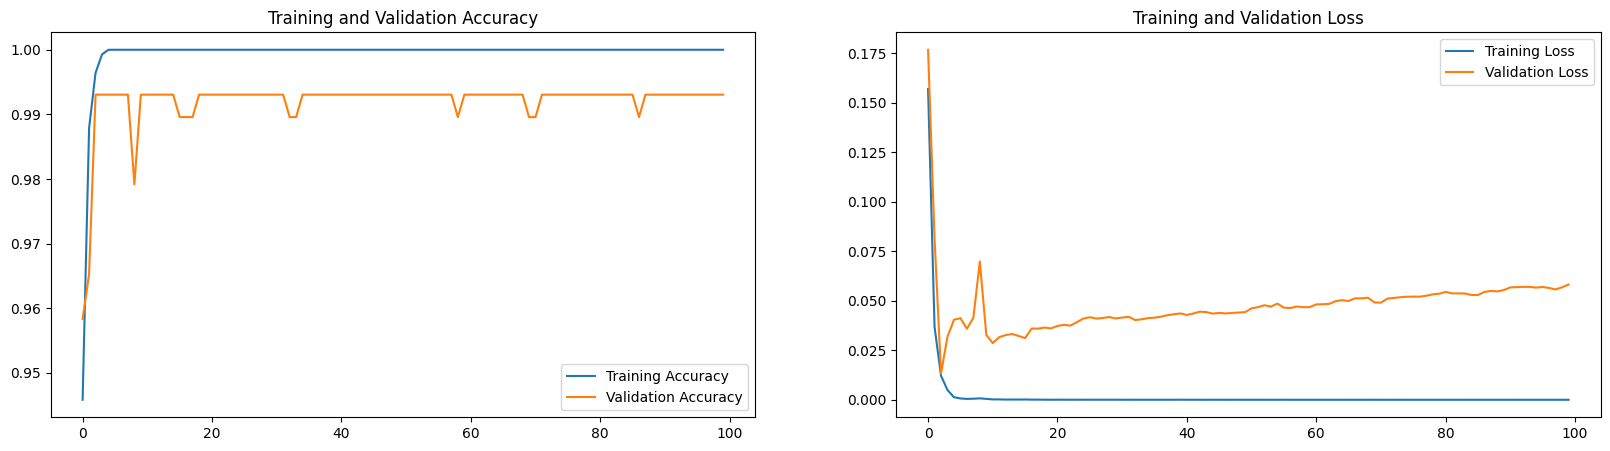

In [16]:
os.makedirs('validpic', exist_ok=True)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('validpic/training_vs_validation.png')
plt.show()

10/10 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13s 625ms/step


2025-02-12 21:46:18.183976: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


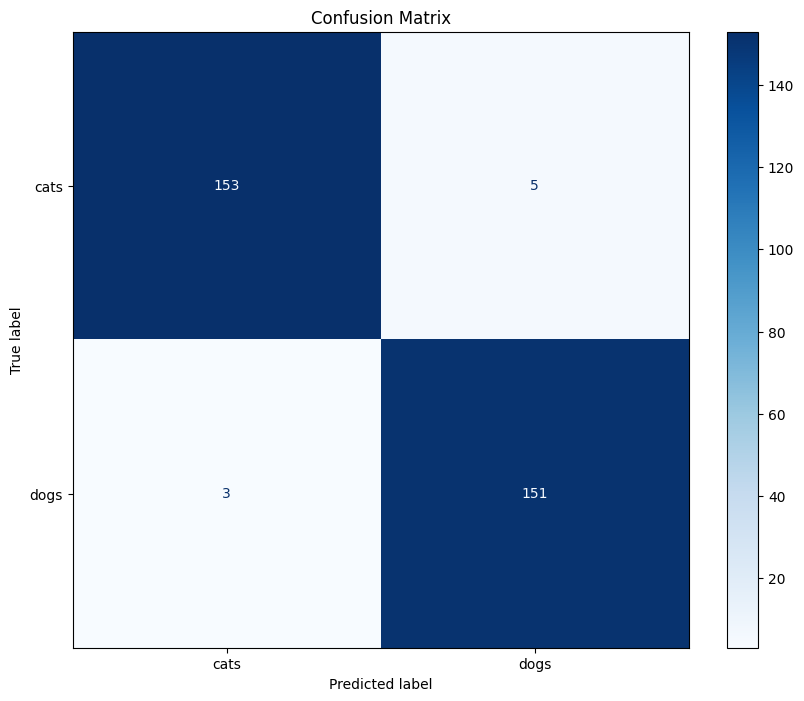

In [17]:
y_pred = model.predict(test_ds)
y_pred_classes = np.argmax(y_pred, axis=1)

y_true = []
for _, labels in test_ds:
    y_true.extend(labels.numpy())
y_true = np.array(y_true)

cm = confusion_matrix(y_true, y_pred_classes)

fig, ax = plt.subplots(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(ax=ax, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.savefig('validpic/confusion_matrix.png')
plt.show()

10/10 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 64ms/step 


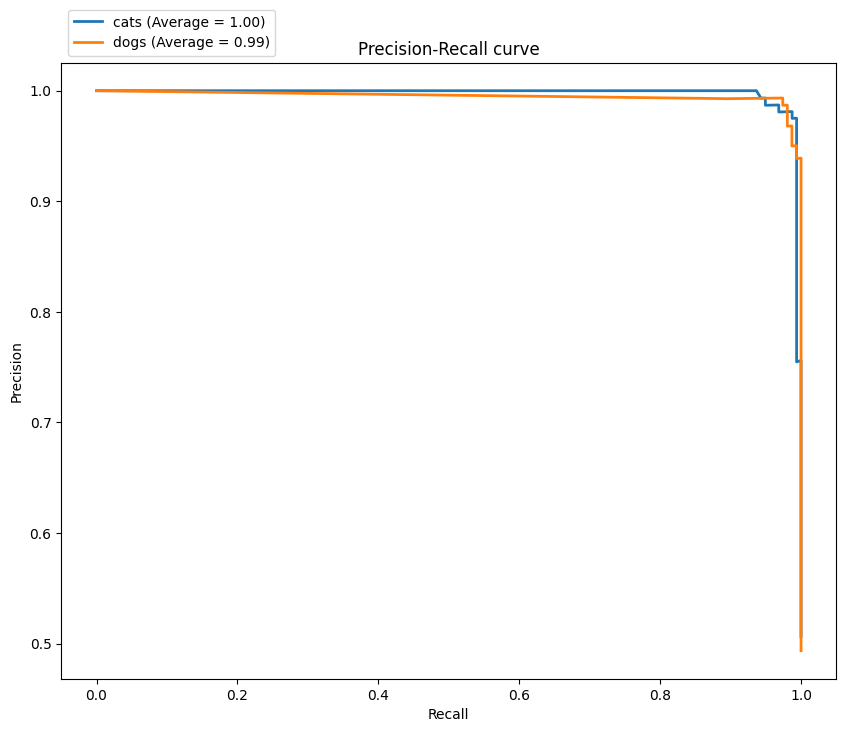

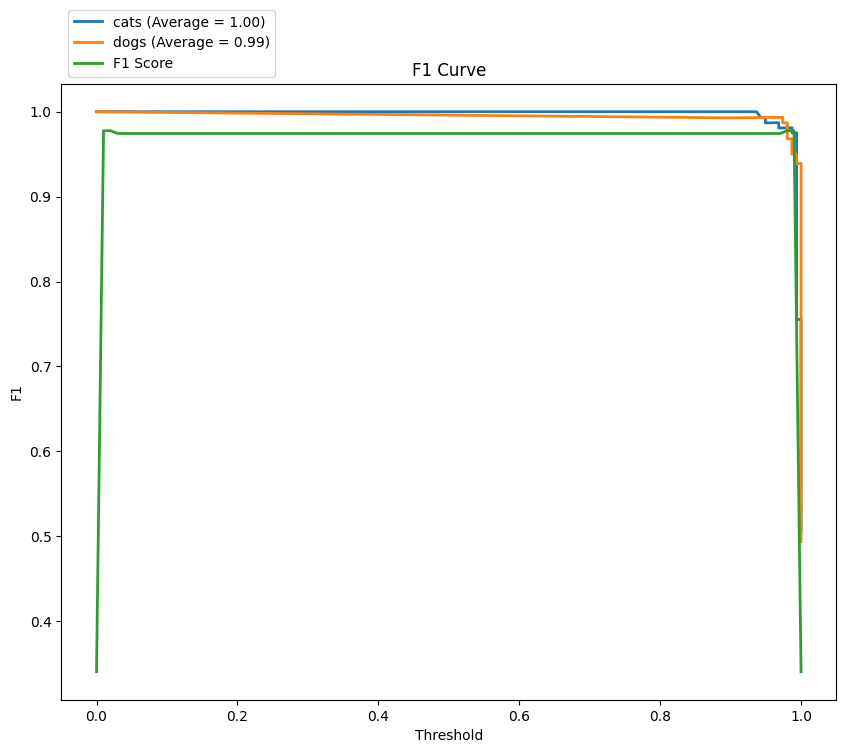

In [18]:
y_pred = model.predict(test_ds)
y_pred_classes = np.argmax(y_pred, axis=1)


y_true = []
for _, labels in test_ds:
    y_true.extend(labels.numpy())
y_true = np.array(y_true)


precision = dict()
recall = dict()
average_precision = dict()
for i in range(num_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_true == i, y_pred[:, i])
    average_precision[i] = average_precision_score(y_true == i, y_pred[:, i])


plt.figure(figsize=(10, 8))
for i in range(num_classes):
    plt.plot(recall[i], precision[i], lw=2, label=f'{class_names[i]} (Average = {average_precision[i]:.2f})')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall curve")
plt.legend(loc='lower left', bbox_to_anchor=(0, 1))
plt.savefig('validpic/precision_recall_curve.png')
plt.show()


y_pred_proba = np.max(y_pred, axis=1)           # ‡∏Ñ‡πà‡∏≤‡∏Ñ‡∏ß‡∏≤‡∏°‡∏°‡∏±‡πà‡∏ô‡πÉ‡∏à‡∏™‡∏π‡∏á‡∏™‡∏∏‡∏î
y_pred_label = np.argmax(y_pred, axis=1)        # class ‡∏ó‡∏µ‡πà predict

f1 = []
for t in thresholds:
    y_pred_thresh = [
        y_pred_label[i] if y_pred_proba[i] >= t else -1  # -1 = ‡∏ó‡∏¥‡πâ‡∏á sample ‡∏ô‡∏µ‡πâ
        for i in range(len(y_true))
    ]
    # filter ‡∏ó‡∏¥‡πâ‡∏á -1 ‡∏Å‡πà‡∏≠‡∏ô‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì F1
    valid_idx = [i for i, v in enumerate(y_pred_thresh) if v != -1]
    f1_t = f1_score(y_true[valid_idx], np.array(y_pred_thresh)[valid_idx], average="weighted")
    f1.append(f1_t)

# plt.axhline(f1[0], color='red', linestyle='--', label=f'Baseline F1 (t=0): {f1[0]:.2f}')
plt.figure(figsize=(10, 8))
plt.plot(thresholds, f1, lw=2, label="F1 Score (weighted)")
plt.xlabel("Threshold")
plt.ylabel("F1")
plt.title("F1 Curve")
plt.legend()
plt.savefig('validpic/f1_curve.png')
plt.show()
